# Data Pre Processing

In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['Donuts', 'Fried_rice', 'Pizza']
Types of classes labels found:  3


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    

In [3]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

   Labels                                 image
0  Donuts  dataset_path/Donuts/00FAM7JH1SMS.jpg
1  Donuts  dataset_path/Donuts/058EB4MR27V3.jpg
2  Donuts  dataset_path/Donuts/05R77196O1EI.jpg
3  Donuts  dataset_path/Donuts/05UMHXBXD57X.jpg
4  Donuts  dataset_path/Donuts/071B44KIEMZY.jpg
     Labels                                image
1495  Pizza  dataset_path/Pizza/8F7S081L4I8U.jpg
1496  Pizza  dataset_path/Pizza/8FFS9B1MNBM1.jpg
1497  Pizza  dataset_path/Pizza/8FIMCWVEPGDJ.jpg
1498  Pizza  dataset_path/Pizza/8FM9XBJN9EEB.jpg
1499  Pizza  dataset_path/Pizza/8G2AJFO8DVQP.jpg


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1500
Donuts        500
Fried_rice    500
Pizza         500
Name: Labels, dtype: int64


In [6]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(1500, 224, 224, 3)

In [7]:
y=df['Labels'].values
print(y)

['Donuts' 'Donuts' 'Donuts' ... 'Pizza' 'Pizza' 'Pizza']


In [8]:
y=y.reshape(-1,1)
print(y)

[['Donuts']
 ['Donuts']
 ['Donuts']
 ...
 ['Pizza']
 ['Pizza']
 ['Pizza']]


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) 
print(Y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [10]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.25, random_state=415)

#inspect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1125, 224, 224, 3)
(1125, 3)
(375, 224, 224, 3)
(375, 3)


# EfficientNetB0 Implementation :

In [11]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [12]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 3)                4053414   
                                                                 
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/30
36/36 - 226s - loss: 3.8655 - accuracy: 0.3733 - 226s/epoch - 6s/step
Epoch 2/30
36/36 - 209s - loss: 2.2265 - accuracy: 0.4178 - 209s/epoch - 6s/step
Epoch 3/30
36/36 - 208s - loss: 2.0568 - accuracy: 0.4764 - 208s/epoch - 6s/step
Epoch 4/30
36/36 - 206s - loss: 1.5768 - accuracy: 0.5236 - 206s/epoch - 6s/step
Epoch 5/30
36/36 - 207s - loss: 1.3012 - accuracy: 0.5440 - 207s/epoch - 6s/step
Epoch 6/30
36/36 - 209s - loss: 1.248

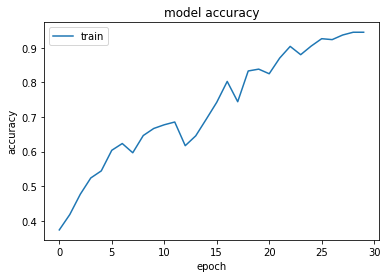

In [13]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [14]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

12/12 [==============================] - 16s 1s/step - loss: 1.7707 - accuracy: 0.6587
Loss = 1.770676612854004
Test Accuracy = 0.6586666703224182


# Testing the Model On Unseen data

Input image shape: (1, 224, 224, 3)


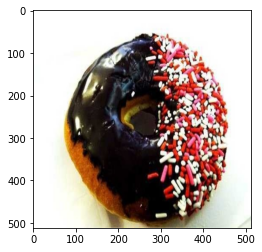

In [15]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'Image1.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [16]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 1s 1s/step


array([[0., 1., 0.]], dtype=float32)

Input image shape: (1, 224, 224, 3)


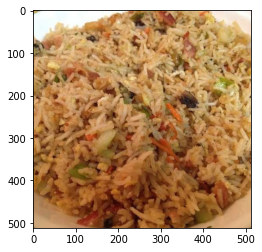

In [17]:
img_path = 'Image2.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [18]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 0s 289ms/step


array([[0., 1., 0.]], dtype=float32)

Input image shape: (1, 224, 224, 3)


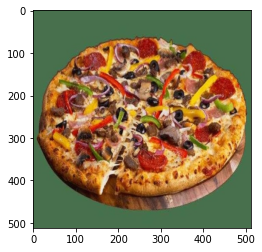

In [20]:
img_path = 'Image3.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [21]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 0s 66ms/step


array([[0., 1., 0.]], dtype=float32)

In [22]:
filename = "Model_1.h5"
model.save(filename)